In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_graphviz
import xgboost as xgb
from xgboost import XGBRegressor
import time
import lightgbm as lgb

# Review, prepare and split the dataset into two datasets: 70% training and 30% test

In [2]:

# read in the cleaned csv

df = pd.read_csv('train_data_1.csv')

df

,taxi_zone,datetime,passenger_count,year_month,week,hour,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061315,265,2023-04-30 19:00:00,41.0,2023-04,6,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061316,265,2023-04-30 20:00:00,53.0,2023-04,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061317,265,2023-04-30 21:00:00,45.0,2023-04,6,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061318,265,2023-04-30 22:00:00,62.0,2023-04,6,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [3]:
df = df.drop('datetime', axis=1)
df

,taxi_zone,passenger_count,year_month,week,hour,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,0.0,2022-01,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
1,1,0.0,2022-01,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
2,1,2.0,2022-01,5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
3,1,1.0,2022-01,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
4,1,8.0,2022-01,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061315,265,41.0,2023-04,6,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061316,265,53.0,2023-04,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061317,265,45.0,2023-04,6,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061318,265,62.0,2023-04,6,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [4]:
df.dtypes

taxi_zone                            int64
passenger_count                    float64
year_month                          object
week                                 int64
hour                                 int64
entertainment_and_recreation       float64
financial_services                 float64
food_and_beverage                  float64
parking_and_automotive_services    float64
professional_services              float64
real_estate                        float64
retail_services                    float64
transportation                     float64
hospital                           float64
hotspots                           float64
school                             float64
total_business                     float64
holiday                             object
dtype: object

In [5]:
df['taxi_zone'] = df['taxi_zone'].astype('category')
df['year_month'] = df['year_month'].astype('category')
df['week'] = df['week'].astype('category')
df['hour'] = df['hour'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df.dtypes

taxi_zone                          category
passenger_count                     float64
year_month                         category
week                               category
hour                               category
entertainment_and_recreation        float64
financial_services                  float64
food_and_beverage                   float64
parking_and_automotive_services     float64
professional_services               float64
real_estate                         float64
retail_services                     float64
transportation                      float64
hospital                            float64
hotspots                            float64
school                              float64
total_business                      float64
holiday                            category
dtype: object

# set up dummies features

In [6]:
# set up dummies features
df = pd.get_dummies(df)
df.dtypes

passenger_count                      float64
entertainment_and_recreation         float64
financial_services                   float64
food_and_beverage                    float64
parking_and_automotive_services      float64
                                      ...   
holiday_New Year's Day (Observed)       bool
holiday_No                              bool
holiday_Thanksgiving                    bool
holiday_Veterans Day                    bool
holiday_Washington's Birthday           bool
Length: 338, dtype: object

In [7]:
for col in df.columns:
    print(col)

passenger_count
entertainment_and_recreation
financial_services
food_and_beverage
parking_and_automotive_services
professional_services
real_estate
retail_services
transportation
hospital
hotspots
school
total_business
taxi_zone_1
taxi_zone_2
taxi_zone_3
taxi_zone_4
taxi_zone_5
taxi_zone_6
taxi_zone_7
taxi_zone_8
taxi_zone_9
taxi_zone_10
taxi_zone_11
taxi_zone_12
taxi_zone_13
taxi_zone_14
taxi_zone_15
taxi_zone_16
taxi_zone_17
taxi_zone_18
taxi_zone_19
taxi_zone_20
taxi_zone_21
taxi_zone_22
taxi_zone_23
taxi_zone_24
taxi_zone_25
taxi_zone_26
taxi_zone_27
taxi_zone_28
taxi_zone_29
taxi_zone_30
taxi_zone_31
taxi_zone_32
taxi_zone_33
taxi_zone_34
taxi_zone_35
taxi_zone_36
taxi_zone_37
taxi_zone_38
taxi_zone_39
taxi_zone_40
taxi_zone_41
taxi_zone_42
taxi_zone_43
taxi_zone_44
taxi_zone_45
taxi_zone_46
taxi_zone_47
taxi_zone_48
taxi_zone_49
taxi_zone_50
taxi_zone_51
taxi_zone_52
taxi_zone_53
taxi_zone_54
taxi_zone_55
taxi_zone_56
taxi_zone_57
taxi_zone_58
taxi_zone_59
taxi_zone_60
taxi_zone_

# Shuffle and split the dataset into two datasets: 70% training and 30% test

In [8]:
# shuffle the data
df = df.sample(frac=1, random_state=987)
print(df.head(5))

         passenger_count  entertainment_and_recreation  financial_services  \
1492633              4.0                           0.0                 1.0   
3057154             38.0                           0.0                 0.0   
1286185             25.0                           0.0                 0.0   
826101               0.0                           6.0                 0.0   
1821859              4.0                           8.0                 4.0   

         food_and_beverage  parking_and_automotive_services  \
1492633                0.0                              3.0   
3057154                0.0                              0.0   
1286185                0.0                             16.0   
826101                 0.0                             18.0   
1821859                0.0                             47.0   

         professional_services  real_estate  retail_services  transportation  \
1492633                    1.0         27.0             46.0            

In [9]:
# split data set to training data and test data
y = pd.DataFrame(df["passenger_count"])
X = df.drop(labels=["passenger_count"], axis=1)

# divide data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

In [10]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Juneteenth National Independence Day (Observed),holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,22.0,0.0,0.0,20.0,14.0,186.0,70.0,17.0,0.0,2.0,...,False,False,False,False,False,False,True,False,False,False
1,0.0,1.0,0.0,1.0,3.0,24.0,44.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,10.0,2.0,0.0,12.0,17.0,35.0,173.0,0.0,0.0,10.0,...,False,False,False,False,False,False,True,False,False,False
3,0.0,3.0,0.0,2.0,17.0,43.0,111.0,0.0,0.0,10.0,...,False,False,False,False,False,False,True,False,False,False
4,14.0,3.0,1.0,42.0,71.0,72.0,222.0,2.0,0.0,6.0,...,False,False,False,False,False,False,True,False,False,False


# use XGboost regression

# instantiate the model

In [11]:

# instantiate the model
xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1)

# record the start time
start_time = time.time()

# fit the model
xgb.fit(X_train, y_train)

# calculate and print the time taken
time_taken = time.time() - start_time
print(f"Time taken to fit the model: {time_taken} seconds")

Time taken to fit the model: 758.6743271350861 seconds


# Print the predicted target feature value¶

In [12]:
# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
xgb_predictions_train = xgb.predict(X_train).ravel()
y_train_1d = y_train.values.ravel()

df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': xgb_predictions_train})
df_true_vs_xgb_predicted.head(100)


,Actual,Predicted
0,0.0,4.370772
1,0.0,13.437703
2,21.0,4.455716
3,1.0,2.071207
4,6.0,15.504159
...,...,...
95,0.0,-0.845014
96,1.0,6.524962
97,363.0,118.600044
98,0.0,6.607433


In [13]:
# Calculate MAE, MSE and RMSE
mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
rmse = np.sqrt(mse) # or mse**(0.5)  

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 34.483633731922644
Mean Squared Error (MSE): 5413.818514370288
Root Mean Squared Error (RMSE): 73.57865529058198


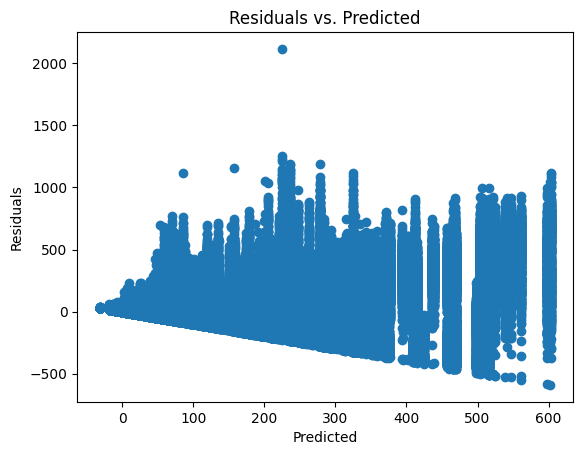

In [14]:
# Convert to DataFrame
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
xgb_predictions_train_df = pd.DataFrame(xgb_predictions_train, columns=['Predicted']).reset_index(drop=True)

# Calculate residuals
residuals = y_train_df['passenger_count'] - xgb_predictions_train_df['Predicted']

# Plot residuals
plt.scatter(xgb_predictions_train_df, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


In [15]:
# plt.hist(residuals, bins=20)
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.title('Distribution of Residuals')
# plt.show()

In [16]:
print(len(y_train))
print(len(xgb_predictions_train))


2142924
2142924


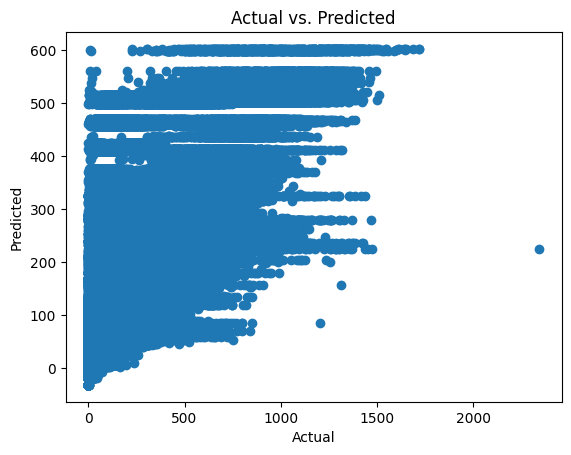

In [17]:
plt.scatter(y_train, xgb_predictions_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


# convert dataset into DMatrix for XGBoost to check it's better，the outcome shows it's not better.

In [18]:
# import xgboost as xgb

# # convert your dataset into DMatrix for XGBoost
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)


In [19]:
# # set xgboost parameters
# param = {
#     'max_depth': 3,  # the maximum depth of each tree
#     'eta': 0.3,  # the training step for each iteration
#     'silent': 1,  # logging mode - quiet
#     'objective': 'reg:linear'}  # regression linear

# num_round = 20  # the number of training iterations

# # train the model
# bst = xgb.train(param, dtrain, num_round)


In [20]:
# # Predicted value for all examples, 
# # using the trained model, on in-sample data (same sample used for training and test)
# xgb_predictions_train = bst.predict(dtrain).ravel()
# y_train_1d = y_train.values.ravel()

# df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': xgb_predictions_train})
# df_true_vs_xgb_predicted.head(100)

In [21]:
# # Calculate MAE, MSE and RMSE
# mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
# mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
# rmse = np.sqrt(mse) # or mse**(0.5)  

# print('Mean Absolute Error (MAE):', mae)
# print('Mean Squared Error (MSE):', mse)
# print('Root Mean Squared Error (RMSE):', rmse)

# use lightgbm regression

In [22]:
# from lightgbm import LGBMRegressor


# # instantiate the model

# # lgbm = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1)
# lgbm = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1, verbose=-1)

# # record the start time
# start_time = time.time()

# # fit the model
# lgbm.fit(X_train, y_train)

# # calculate and print the time taken
# time_taken = time.time() - start_time
# print(f"Time taken to fit the model: {time_taken} seconds")


In [23]:
# # Predicted value for all examples, 
# # using the trained model, on in-sample data (same sample used for training and test)
# lgbm_predictions_train = lgbm.predict(X_train).ravel()
# y_train_1d = y_train.values.ravel()

# df_true_vs_lgbm_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': lgbm_predictions_train})
# df_true_vs_lgbm_predicted.head(100)


In [24]:
# # Calculate MAE, MSE and RMSE
# train_mae = metrics.mean_absolute_error(df_true_vs_lgbm_predicted['Actual'], df_true_vs_lgbm_predicted['Predicted'])
# train_mse = metrics.mean_squared_error(df_true_vs_lgbm_predicted['Actual'], df_true_vs_lgbm_predicted['Predicted'])
# train_rmse = np.sqrt(mse) # or mse**(0.5)  

# print('Mean Absolute Error (MAE):', train_mae)
# print('Mean Squared Error (MSE):', train_mse)
# print('Root Mean Squared Error (RMSE):', train_rmse)

# Evaluate the model using the hold-out (30% examples) test set

In [25]:

# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
xgb_predictions_test = xgb.predict(X_test).ravel()
y_test_1d = y_test.values.ravel()

df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_test_1d, 'Predicted': xgb_predictions_test})
df_true_vs_xgb_predicted.head(20)


,Actual,Predicted
0,2.0,14.117970
1,2.0,6.607433
2,858.0,466.554901
3,0.0,-3.824227
4,0.0,9.149013
5,926.0,464.911346
6,12.0,109.402504
7,1.0,5.621504
8,3.0,8.829425
9,0.0,2.991069


In [26]:
# Calculate MAE, MSE and RMSE
test_mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
test_mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
test_rmse = np.sqrt(mse) # or mse**(0.5) 
print("==================== Test Data =======================")
print('Mean Absolute Error (MAE):', test_mae)
print('Mean Squared Error (MSE):', test_mse)
print('Root Mean Squared Error (RMSE):', test_rmse)

print("==================== Train Data =======================")
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

==================== Test Data =======================
Mean Absolute Error (MAE): 34.5524915552855
Mean Squared Error (MSE): 5436.580947582414
Root Mean Squared Error (RMSE): 73.57865529058198
==================== Train Data =======================
Mean Absolute Error (MAE): 34.483633731922644
Mean Squared Error (MSE): 5413.818514370288
Root Mean Squared Error (RMSE): 73.57865529058198


In [27]:
import pickle

# save the model to disk
filename = 'basic_XGboost_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))

# run pickle

In [28]:
loaded_model = pickle.load(open('basic_XGboost_model.pkl', 'rb'))
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [29]:
X_test.head(2)

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Juneteenth National Independence Day (Observed),holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,8.0,1.0,0.0,69.0,27.0,178.0,97.0,2.0,0.0,2.0,...,False,False,False,False,False,False,True,False,False,False
1,7.0,0.0,0.0,5.0,2.0,30.0,11.0,3.0,0.0,2.0,...,False,False,False,False,False,False,True,False,False,False


In [30]:
# let's say you have some data in X_test
predictions = loaded_model.predict(X_test)

# print predictions
print(predictions)

[ 14.11797     6.6074333 466.5549    ...   5.57732     6.764503
  15.357104 ]


In [31]:
print(X_test.columns)

Index(['entertainment_and_recreation', 'financial_services',
       'food_and_beverage', 'parking_and_automotive_services',
       'professional_services', 'real_estate', 'retail_services',
       'transportation', 'hospital', 'hotspots',
       ...
       'holiday_Juneteenth National Independence Day (Observed)',
       'holiday_Labor Day', 'holiday_Martin Luther King Jr. Day',
       'holiday_Memorial Day', 'holiday_New Year's Day',
       'holiday_New Year's Day (Observed)', 'holiday_No',
       'holiday_Thanksgiving', 'holiday_Veterans Day',
       'holiday_Washington's Birthday'],
      dtype='object', length=337)


# try to run two month data

In [58]:

# read in the cleaned csv

predict_df = pd.read_csv('train_data_1.csv')

predict_df

,taxi_zone,datetime,passenger_count,year_month,week,hour,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061315,265,2023-04-30 19:00:00,41.0,2023-04,6,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061316,265,2023-04-30 20:00:00,53.0,2023-04,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061317,265,2023-04-30 21:00:00,45.0,2023-04,6,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061318,265,2023-04-30 22:00:00,62.0,2023-04,6,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [59]:
predict_df.dtypes

taxi_zone                            int64
datetime                            object
passenger_count                    float64
year_month                          object
week                                 int64
hour                                 int64
entertainment_and_recreation       float64
financial_services                 float64
food_and_beverage                  float64
parking_and_automotive_services    float64
professional_services              float64
real_estate                        float64
retail_services                    float64
transportation                     float64
hospital                           float64
hotspots                           float64
school                             float64
total_business                     float64
holiday                             object
dtype: object

In [60]:
predict_df['taxi_zone'] = predict_df['taxi_zone'].astype('category')
predict_df['year_month'] = predict_df['year_month'].astype('category')
predict_df['week'] = predict_df['week'].astype('category')
predict_df['hour'] = predict_df['hour'].astype('category')
predict_df['holiday'] = predict_df['holiday'].astype('category')
predict_df.dtypes

taxi_zone                          category
datetime                             object
passenger_count                     float64
year_month                         category
week                               category
hour                               category
entertainment_and_recreation        float64
financial_services                  float64
food_and_beverage                   float64
parking_and_automotive_services     float64
professional_services               float64
real_estate                         float64
retail_services                     float64
transportation                      float64
hospital                            float64
hotspots                            float64
school                              float64
total_business                      float64
holiday                            category
dtype: object

In [61]:
# Convert the 'datetime' column to datetime format
predict_df['datetime'] = pd.to_datetime(predict_df['datetime'])

# Filter rows based on year and month
df_2023_jan_feb = predict_df[(predict_df['datetime'].dt.year == 2023) & (predict_df['datetime'].dt.month.isin([1, 2]))]
df_2023_jan_feb

,taxi_zone,datetime,passenger_count,year_month,week,hour,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
8760,1,2023-01-01 00:00:00,0.0,2023-01,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
8761,1,2023-01-01 01:00:00,0.0,2023-01,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
8762,1,2023-01-01 02:00:00,4.0,2023-01,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
8763,1,2023-01-01 03:00:00,11.0,2023-01,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
8764,1,2023-01-01 04:00:00,12.0,2023-01,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059851,265,2023-02-28 19:00:00,46.0,2023-02,1,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3059852,265,2023-02-28 20:00:00,38.0,2023-02,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3059853,265,2023-02-28 21:00:00,41.0,2023-02,1,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3059854,265,2023-02-28 22:00:00,30.0,2023-02,1,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [62]:
df_2023_jan_feb = df_2023_jan_feb.drop('datetime', axis=1)
df_2023_jan_feb

,taxi_zone,passenger_count,year_month,week,hour,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
8760,1,0.0,2023-01,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
8761,1,0.0,2023-01,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
8762,1,4.0,2023-01,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
8763,1,11.0,2023-01,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
8764,1,12.0,2023-01,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059851,265,46.0,2023-02,1,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3059852,265,38.0,2023-02,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3059853,265,41.0,2023-02,1,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3059854,265,30.0,2023-02,1,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [63]:
# set up dummies features
df_2023_jan_feb = pd.get_dummies(df_2023_jan_feb)
df_2023_jan_feb.dtypes

passenger_count                      float64
entertainment_and_recreation         float64
financial_services                   float64
food_and_beverage                    float64
parking_and_automotive_services      float64
                                      ...   
holiday_New Year's Day (Observed)       bool
holiday_No                              bool
holiday_Thanksgiving                    bool
holiday_Veterans Day                    bool
holiday_Washington's Birthday           bool
Length: 338, dtype: object

In [64]:
for col in df_2023_jan_feb.columns:
    print(col)

passenger_count
entertainment_and_recreation
financial_services
food_and_beverage
parking_and_automotive_services
professional_services
real_estate
retail_services
transportation
hospital
hotspots
school
total_business
taxi_zone_1
taxi_zone_2
taxi_zone_3
taxi_zone_4
taxi_zone_5
taxi_zone_6
taxi_zone_7
taxi_zone_8
taxi_zone_9
taxi_zone_10
taxi_zone_11
taxi_zone_12
taxi_zone_13
taxi_zone_14
taxi_zone_15
taxi_zone_16
taxi_zone_17
taxi_zone_18
taxi_zone_19
taxi_zone_20
taxi_zone_21
taxi_zone_22
taxi_zone_23
taxi_zone_24
taxi_zone_25
taxi_zone_26
taxi_zone_27
taxi_zone_28
taxi_zone_29
taxi_zone_30
taxi_zone_31
taxi_zone_32
taxi_zone_33
taxi_zone_34
taxi_zone_35
taxi_zone_36
taxi_zone_37
taxi_zone_38
taxi_zone_39
taxi_zone_40
taxi_zone_41
taxi_zone_42
taxi_zone_43
taxi_zone_44
taxi_zone_45
taxi_zone_46
taxi_zone_47
taxi_zone_48
taxi_zone_49
taxi_zone_50
taxi_zone_51
taxi_zone_52
taxi_zone_53
taxi_zone_54
taxi_zone_55
taxi_zone_56
taxi_zone_57
taxi_zone_58
taxi_zone_59
taxi_zone_60
taxi_zone_

In [65]:
df_2023_jan_feb

,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,...,holiday_Juneteenth National Independence Day (Observed),holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
8760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
8761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
8762,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
8763,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
8764,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059851,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3059852,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3059853,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3059854,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [66]:
# split data set into the features and target feature
target_feature = pd.DataFrame(df_2023_jan_feb["passenger_count"])
features = df_2023_jan_feb.drop(labels=["passenger_count"], axis=1)
features

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Juneteenth National Independence Day (Observed),holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
8760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
8761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
8762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
8763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
8764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3059852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3059853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3059854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [67]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
target_feature.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Juneteenth National Independence Day (Observed),holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
372404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
372405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
372406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [70]:
# make predict
predictions = loaded_model.predict(features)

# print predictions
print(predictions)

[18.690552 14.285308 11.004731 ... 18.690552 18.690552 18.690552]


In [73]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted_passenger_count'])

# Reset indices of your target_feature, features DataFrames to align with predictions_df
target_feature.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)

# Concatenate the target_feature, features and predictions dataframes
result = pd.concat([predictions_df, target_feature, features], axis=1)

result


,Predicted_passenger_count,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,...,holiday_Juneteenth National Independence Day (Observed),holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,18.690552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,14.285308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,11.004731,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
3,7.320142,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,8.624110,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372403,24.068552,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
372404,18.690552,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
372405,18.690552,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
372406,18.690552,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [57]:
result.to_csv("basic_prediction_two_month.csv", index=False)